# Lab 7

**Joseph Livesey**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
import pickle

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16

Before we do anything else, we need to read in the simulated data. We're using the "low $p_T$" data set.

In [2]:
dicts = []

for pkl in ['higgs_100000_pt_250_500.pkl', 'qcd_100000_pt_250_500.pkl']:
    file = open(pkl, 'rb')
    data = pickle.load(file)
    dicts.append(data)

higgs = dicts[0]
qcd   = dicts[1]

In [3]:
higgs.keys(), qcd.keys()

(Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
        't2', 't3', 't21', 't32', 'KtDeltaR'],
       dtype='object'),
 Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
        't2', 't3', 't21', 't32', 'KtDeltaR'],
       dtype='object'))

## Problem 1

Our first goal is to make a stacked histogram plot of mass.

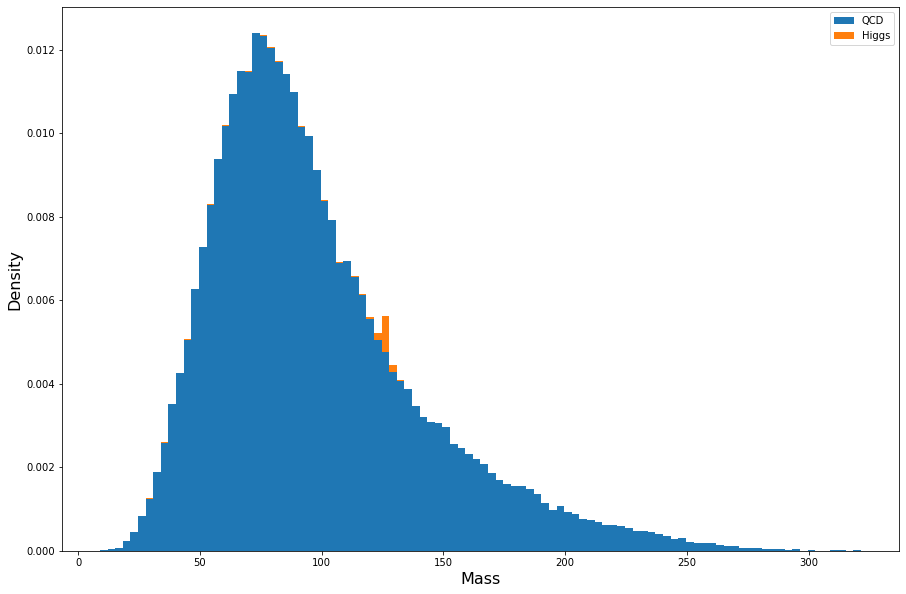

In [4]:
qcd_mass = qcd['mass']
higgs_mass = higgs['mass']

hist = [qcd_mass, higgs_mass]

qcd_weights = np.ones_like(qcd_mass) / 5
higgs_weights = np.ones_like(higgs_mass) / 1000

fig, ax = plt.subplots(1, 1)
ax.hist((qcd_mass, higgs_mass), bins=100, weights=(qcd_weights, higgs_weights), density=True, stacked=True, label=('QCD', 'Higgs'))
ax.set_xlabel('Mass')
ax.set_ylabel('Density')
ax.legend(loc=0);

For low $p_T$, we expect to see $N_\text{Higgs} = 100$ Higgs boson counts against $N_\text{QCD} = 20000$ background counts. Using Poisson statistics, we can find the significance of a Higgs detection based on these values.

In [5]:
significance = stats.poisson.cdf(20100, mu=20000)
significance, stats.norm.ppf(significance)

(0.7615278780931256, 0.7112259282313185)

We calculate a significance of $0.71 \sigma$ (not an optimal significance). Using our approximation that the significance is equal to $N_\text{Higgs}/\sqrt{N_\text{QCD}}$ gets us close.

In [6]:
100/np.sqrt(20000)

0.7071067811865475

This is decently close to the calculated sigma value.

## Problem 2

Looking at the stacked histogram in Problem 1, we can improve our detection significance by eliminating mass ranges in which the QCD background has higher density than the Higgs signal.

In [7]:
qcd_cut_1 = qcd['mass'][qcd['mass'] < 124]
higgs_cut_1 = higgs['mass'][higgs['mass'] < 124]

In [8]:
qcd_counts_1 = len(qcd_mass) - len(qcd_cut_1)
higgs_counts_1 = len(higgs_mass) - len(higgs_cut_1)

qcd_counts_1/100000, higgs_counts_1/100000

(0.22061, 0.70109)

So now, $N_\text{Higgs} = 0.70109 \times 100$, and $N_\text{QCD} = 0.22061 \times 20000$.

In [9]:
(higgs_counts_1/100000 * 100)/np.sqrt(qcd_counts_1/100000 * 20000)

1.055470689572594

This brings us to a significance of about $1.06 \sigma$, which is higher but not spectacular.

In [10]:
qcd_cut_2 = qcd_mass[qcd_mass > 127]
higgs_cut_2 = higgs_mass[higgs_mass > 127]

In [11]:
qcd_counts_2 = len(qcd_mass) - len(qcd_cut_1) - len(qcd_cut_2)
higgs_counts_2 = len(higgs_mass) - len(higgs_cut_1) - len(higgs_cut_2)

qcd_counts_2/100000, higgs_counts_2/100000

(0.01457, 0.53394)

In [12]:
(higgs_counts_2/100000 * 100)/np.sqrt(qcd_counts_2/100000 * 20000)

3.127862716779168

We are now above the $2\sigma$ threshold, with a sigma value of $3.13 \sigma$.

In [13]:
higgs_mass_optimized = []
for m in higgs_mass:
    if m > 124 and m < 127:
        higgs_mass_optimized.append(m)
        
qcd_mass_optimized = []
for m in qcd_mass:
    if m > 124 and m < 127:
        qcd_mass_optimized.append(m)

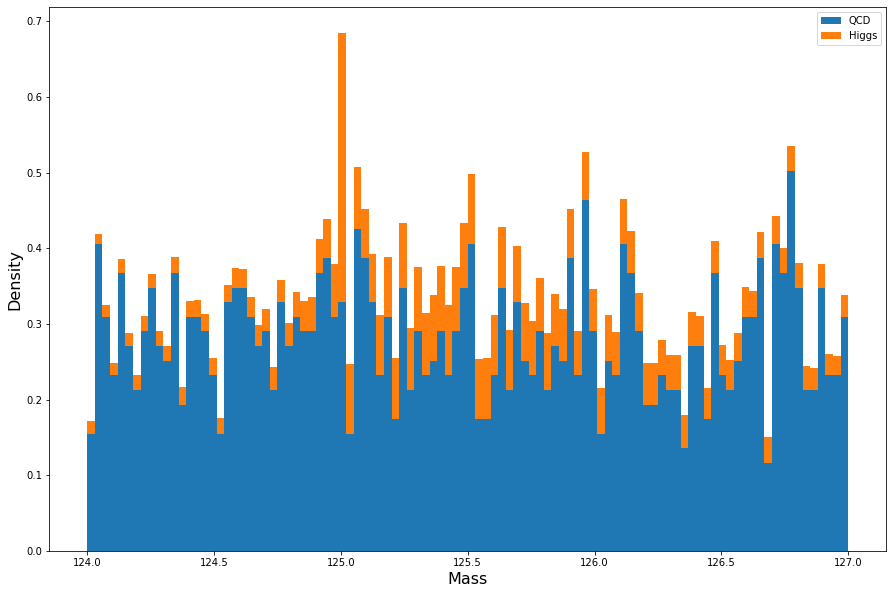

In [14]:
qcd_weights = np.ones_like(qcd_mass_optimized) / 5
higgs_weights = np.ones_like(higgs_mass_optimized) / 1000

fig, ax = plt.subplots(1, 1)
ax.hist((qcd_mass_optimized, higgs_mass_optimized), bins=100, weights=(qcd_weights, higgs_weights), density=True, stacked=True, label=('QCD', 'Higgs'))
ax.set_xlabel('Mass')
ax.set_ylabel('Density')
ax.legend(loc=0);

## Problem 3

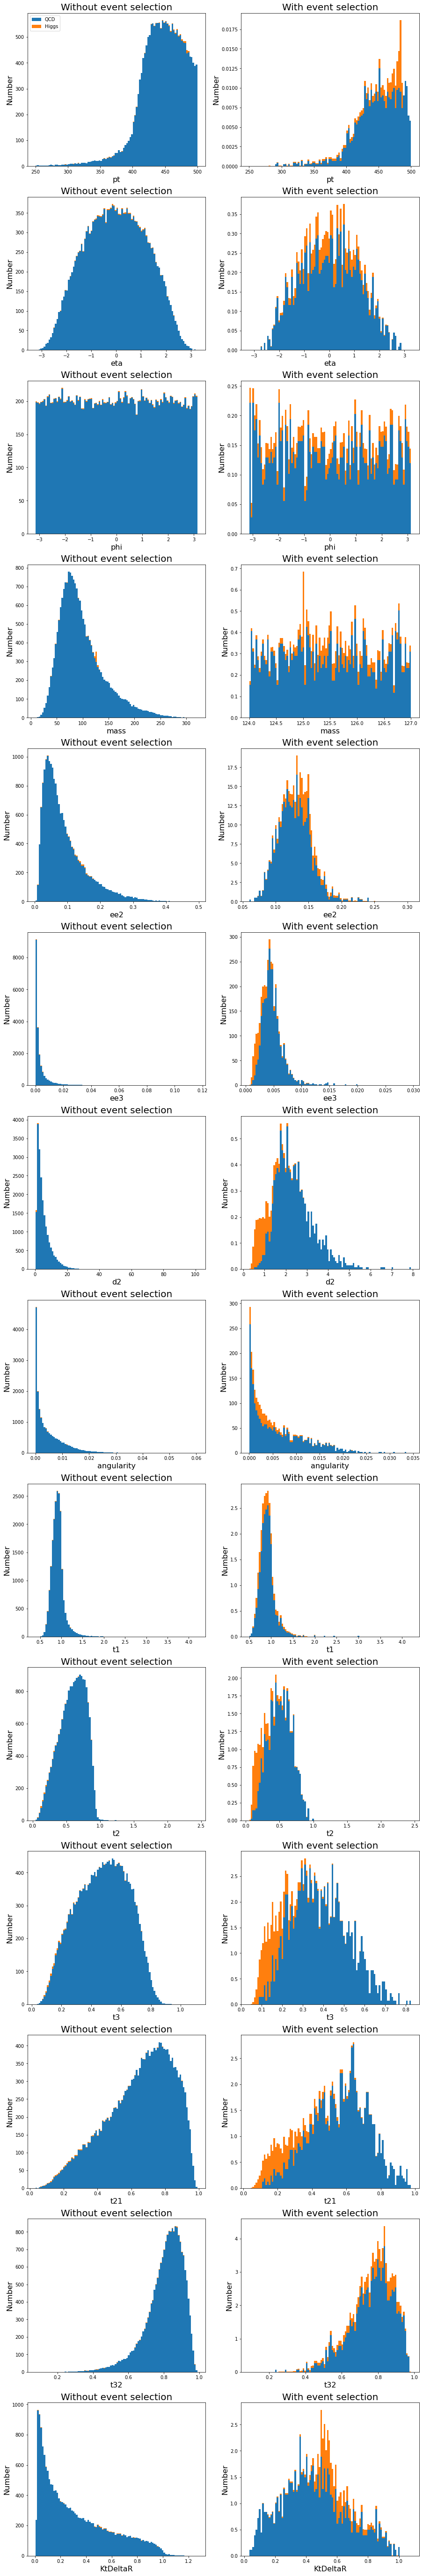

In [15]:
fig, ax = plt.subplots(14, 2, figsize=(15, 100))
n = 0

for key in higgs.keys():
    higgs_optimized = []
    for i in range(len(higgs_mass)):
        if higgs_mass[i] > 124 and higgs_mass[i] < 127:
            higgs_optimized.append(higgs[key][i])
        
    qcd_optimized = []
    for i in range(len(qcd_mass)):
        if qcd_mass[i] > 124 and qcd_mass[i] < 127:
            qcd_optimized.append(qcd[key][i])
            
    qcd_weights = np.ones_like(qcd[key]) / 5
    higgs_weights = np.ones_like(higgs[key]) / 1000
    
    qcd_optimized_weights = np.ones_like(qcd_optimized) / 5
    higgs_optimized_weights = np.ones_like(higgs_optimized) / 1000

    ax[n, 0].hist((qcd[key], higgs[key]), bins=100, log=False, weights=(qcd_weights, higgs_weights), stacked=True, label=('QCD', 'Higgs'))
    ax[n, 1].hist((qcd_optimized, higgs_optimized), bins=100, log=False, weights=(qcd_optimized_weights, higgs_optimized_weights), density=True, stacked=True, label=('QCD', 'Higgs'))
    
    ax[n, 0].set_title('Without event selection')
    ax[n, 1].set_title('With event selection')
    
    for m in range(2):
        ax[n, m].set_xlabel(str(key))
        ax[n, m].set_ylabel('Number')
    
    n += 1
    
ax[0, 0].legend(loc=0);

The histograms without event selection are just like those that we had to make in Lab 5. It is clear that we can further improve the detection significance by making a cut to $\tau_{21}$, which also distinguishes powerfully between Higgs signals and the QCD background, as discussed in Lab 5. Looking at the histograms of the features after making mass cuts, we can tell just visually that the significance of the Higgs detection has increased for all.

## Problem 4

In order to further improve the significance, we will make cuts to the feature $\tau_{21}$. We first take the mass cuts we already made, then apply the new $\tau_{21}$ cuts.

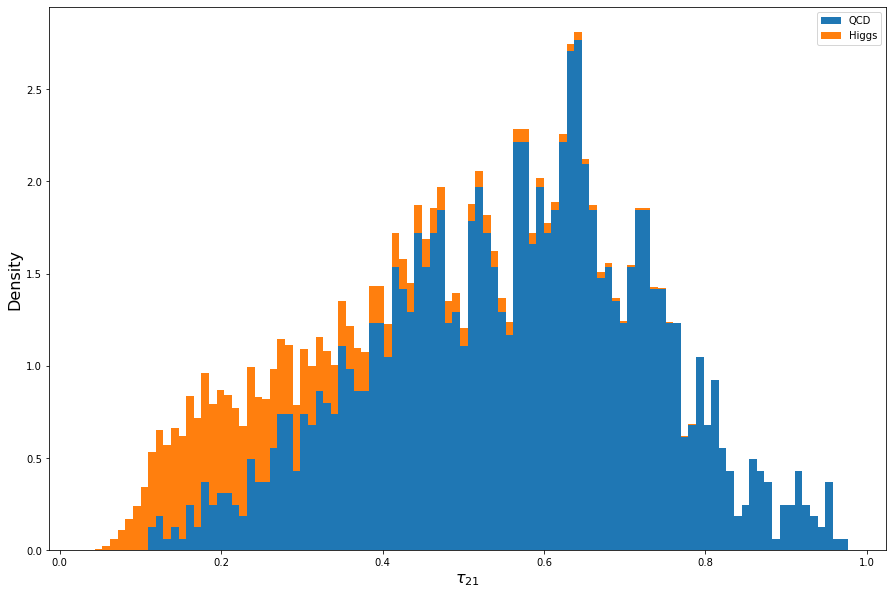

In [16]:
higgs_mass_cut = []
for i in range(len(higgs_mass)):
    if higgs_mass[i] > 124 and higgs_mass[i] < 127:
        higgs_mass_cut.append(higgs['t21'][i])

qcd_mass_cut = []
for i in range(len(qcd_mass)):
    if qcd_mass[i] > 124 and qcd_mass[i] < 127:
        qcd_mass_cut.append(qcd['t21'][i])

qcd_weights = np.ones_like(qcd_mass_cut) / 5
higgs_weights = np.ones_like(higgs_mass_cut) / 1000

fig, ax = plt.subplots(1, 1)
ax.hist((qcd_mass_cut, higgs_mass_cut), bins=100, log=False, weights=(qcd_weights, higgs_weights), density=True, stacked=True, label=('QCD', 'Higgs'))
ax.set_xlabel(r'$\tau_{21}$')
ax.set_ylabel('Density')
ax.legend(loc=0);

We choose to cut everything $\tau_{21} > 0.6$. Carrying this through and taking another look at the feature plots tells us that we can make even further cuts. In particular, we can cut the `KtDeltaR` parameter below 0.4, and the `d2` parameter above 1.5. Recall that these are the spatial extent of the jet on the ATLAS detector and a parameter related to the energy correlation functions, respectively, and they both are useful in distinguishing between jets of differing substructure. We proceed with cuts to all four parameters.

In [17]:
qcd_counts_3 = len( qcd[qcd['mass'] > 124][qcd['mass'] < 127][qcd['t21'] < 0.5][qcd['KtDeltaR'] > 0.4][qcd['d2'] < 1.5] )
higgs_counts_3 = len( higgs[higgs['mass'] > 124][higgs['mass'] < 127][higgs['t21'] < 0.5][higgs['KtDeltaR'] > 0.4][higgs['d2'] < 1.5] )

qcd_counts_3/100000, higgs_counts_3/100000

(0.00149, 0.44541)

Now, as before, we determine the significance using the approximation $N_\text{Higgs}/\sqrt{N_\text{QCD}}$.

In [18]:
(higgs_counts_3/100000 * 100)/np.sqrt(qcd_counts_3/100000 * 20000)

8.159279891982177

We have reached a significance of $8.16 \sigma$, which is exceptionally good. For the sake of completeness, we will now look at all the features again, with all of our optimizing cuts.

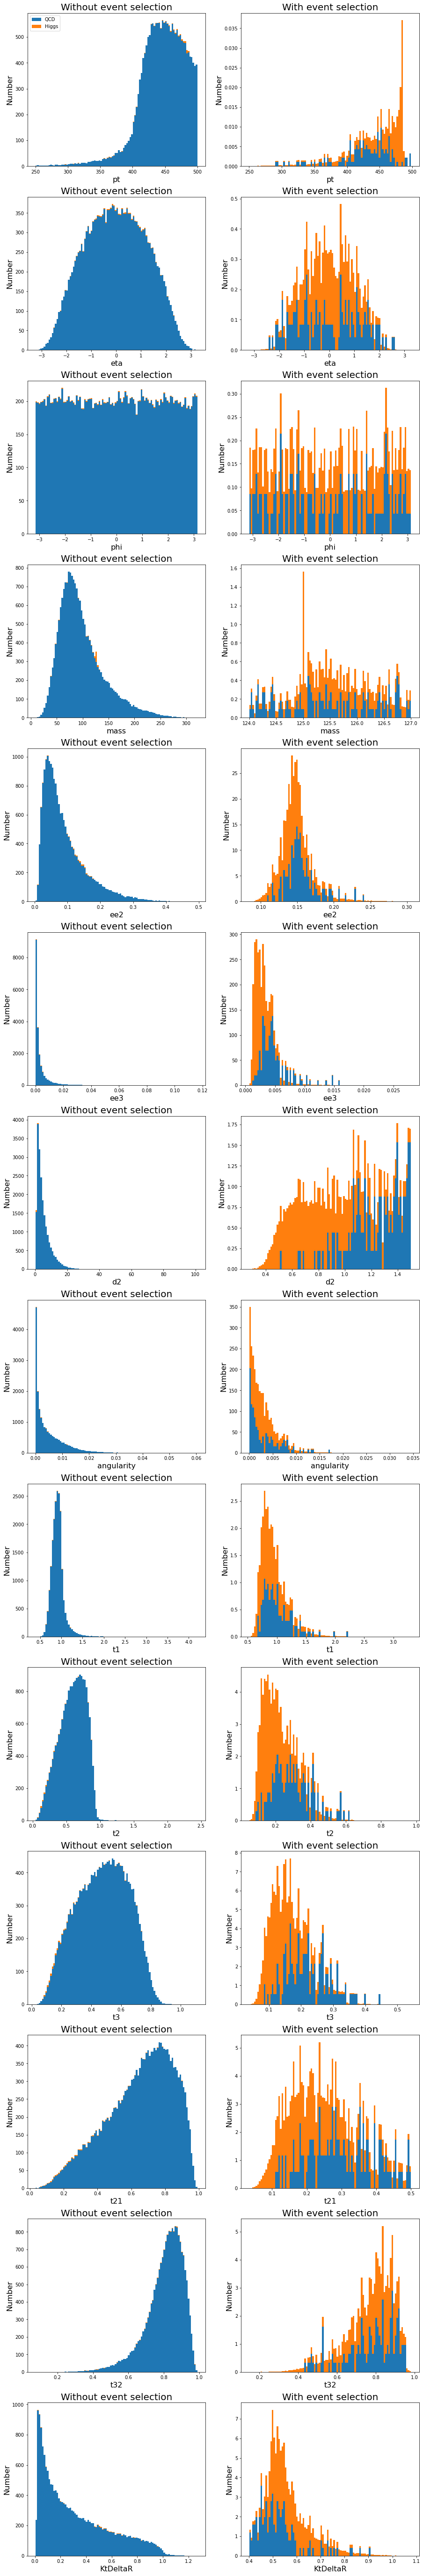

In [19]:
fig, ax = plt.subplots(14, 2, figsize=(15, 100))
n = 0

for key in higgs.keys():
    higgs_optimized = []
    for i in range(len(higgs_mass)):
        if higgs_mass[i] > 124 and higgs_mass[i] < 127 and higgs['t21'][i] < 0.5 and higgs['KtDeltaR'][i] > 0.4 and higgs['d2'][i] < 1.5:
            higgs_optimized.append(higgs[key][i])
        
    qcd_optimized = []
    for i in range(len(qcd_mass)):
        if qcd_mass[i] > 124 and qcd_mass[i] < 127 and qcd['t21'][i] < 0.5 and qcd['KtDeltaR'][i] > 0.4 and qcd['d2'][i] < 1.5:
            qcd_optimized.append(qcd[key][i])
            
    qcd_weights = np.ones_like(qcd[key]) / 5
    higgs_weights = np.ones_like(higgs[key]) / 1000
    
    qcd_optimized_weights = np.ones_like(qcd_optimized) / 5
    higgs_optimized_weights = np.ones_like(higgs_optimized) / 1000

    ax[n, 0].hist((qcd[key], higgs[key]), bins=100, log=False, weights=(qcd_weights, higgs_weights), stacked=True, label=('QCD', 'Higgs'))
    ax[n, 1].hist((qcd_optimized, higgs_optimized), bins=100, log=False, weights=(qcd_optimized_weights, higgs_optimized_weights), density=True, stacked=True, label=('QCD', 'Higgs'))
    
    ax[n, 0].set_title('Without event selection')
    ax[n, 1].set_title('With event selection')
    
    for m in range(2):
        ax[n, m].set_xlabel(str(key))
        ax[n, m].set_ylabel('Number')
    
    n += 1
    
ax[0, 0].legend(loc=0);

There aren't any more obvious cuts we can make in order to significantly increase the detection significance.

## Problem 5

The two parameters we made cuts on, `mass` and `t21`, are plotted here in a 2D histogram.

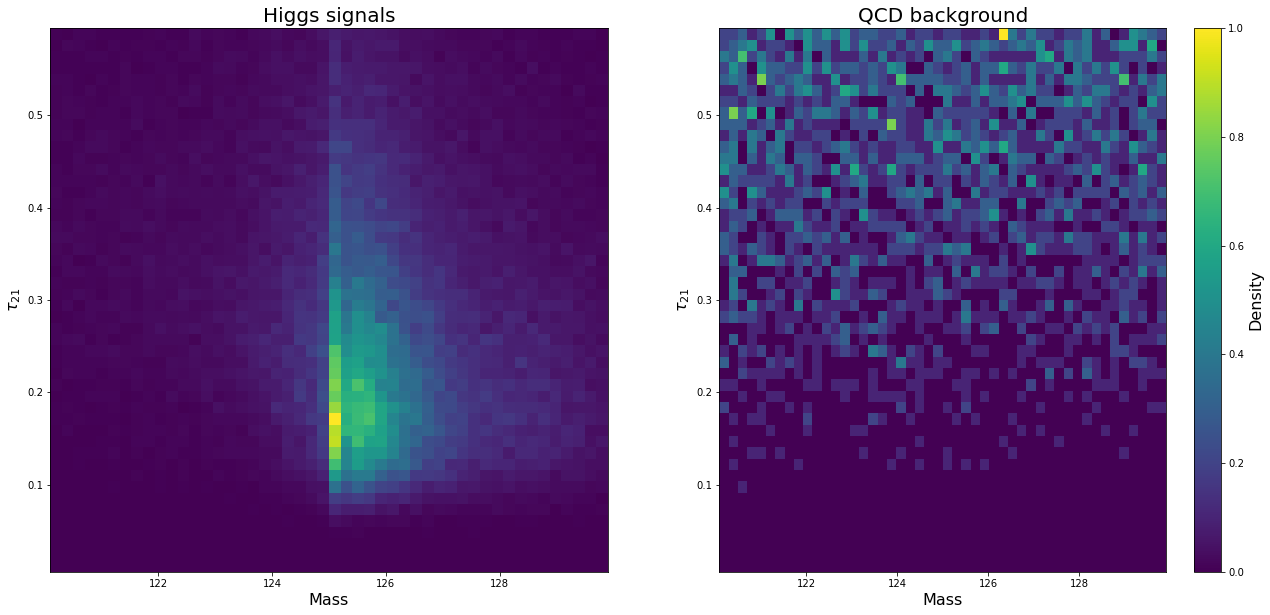

In [20]:
mass_edges = np.linspace(120, 130, 50)
t21_edges  = np.linspace(0.0, 0.6, 50)

mass_centers = (mass_edges[:-1] + mass_edges[1:]) / 2
t21_centers  = (t21_edges[:-1] + t21_edges[1:]) / 2

higgs_hist, higgs_masses, higgs_t21s = np.histogram2d(higgs['mass'], higgs['t21'], bins=[mass_edges, t21_edges], density=True)
qcd_hist, qcd_masses, qcd_t21s = np.histogram2d(qcd['mass'], qcd['t21'], bins=[mass_edges, t21_edges], density=True)

fig, axes = plt.subplots(1, 2, figsize=(22, 10))
axes[0].pcolormesh(mass_centers, t21_centers, higgs_hist.T)
axes[1].pcolormesh(mass_centers, t21_centers, qcd_hist.T)
axes[0].set_title('Higgs signals')
axes[1].set_title('QCD background')
for ax in axes:
    ax.set_xlabel('Mass')
    ax.set_ylabel(r'$\tau_{21}$')
plt.colorbar(plt.cm.ScalarMappable(), label='Density');

There appears to be a sensitivity "peak" (where the Higgs histogram is taller than the QCD histogram) at about a mass of 125.

# Lab 8
## Problem 1

We will now apply our feature cuts to the analysis of pseudo-experimental data. First, we must read in the data.

In [21]:
import pandas as pd

high_data = pd.read_hdf('data_highLumi_pt_250_500.h5')
low_data  = pd.read_hdf('data_lowLumi_pt_250_500.h5')

In [22]:
len(high_data['mass']), len(low_data['mass'])

(40344, 4060)

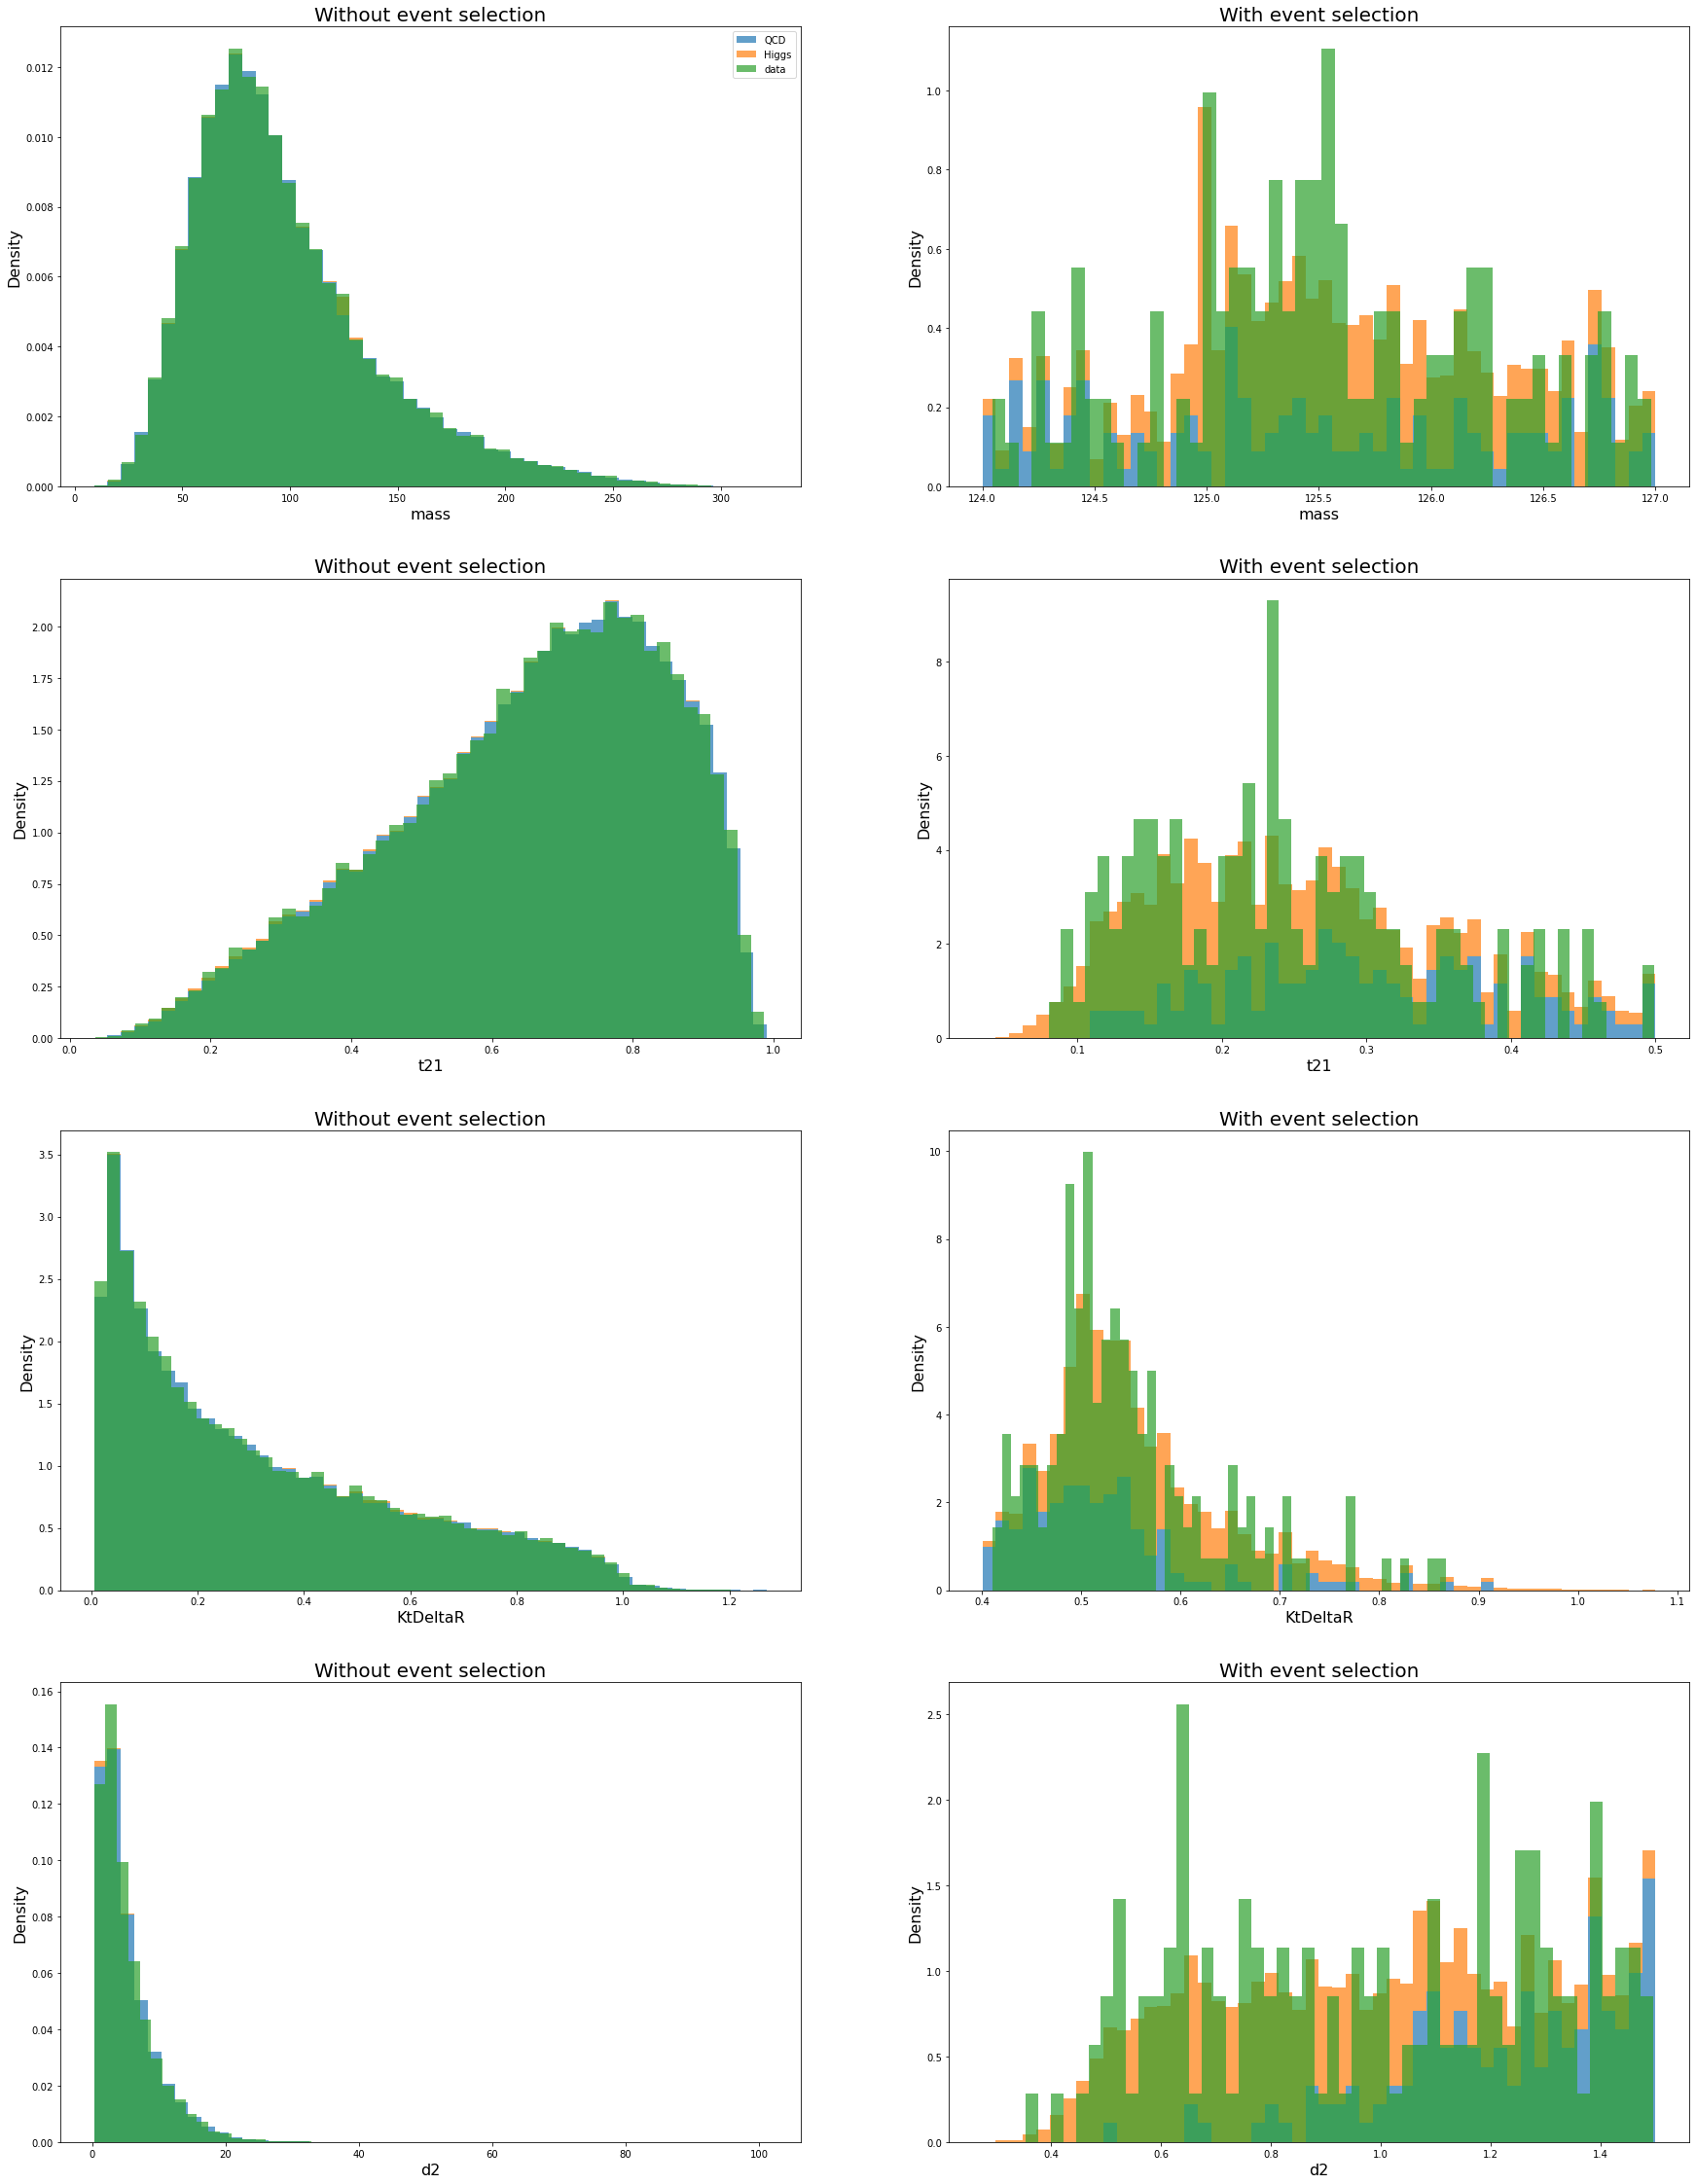

In [23]:
fig, ax = plt.subplots(4, 2, figsize=(30, 40))
n = 0
for key in ['mass', 't21', 'KtDeltaR', 'd2']:
    higgs_optimized = []
    for i in range(len(higgs[key])):
        if higgs_mass[i] > 124 and higgs_mass[i] < 127 and higgs['t21'][i] < 0.5 and higgs['KtDeltaR'][i] > 0.4 and higgs['d2'][i] < 1.5:
            higgs_optimized.append(higgs[key][i])
        
    qcd_optimized = []
    for i in range(len(qcd[key])):
        if qcd_mass[i] > 124 and qcd_mass[i] < 127 and qcd['t21'][i] < 0.5 and qcd['KtDeltaR'][i] > 0.4 and qcd['d2'][i] < 1.5:
            qcd_optimized.append(qcd[key][i])
    
    high_data_optimized = []
    for i in range(len(high_data[key])):
        if high_data['mass'][i] > 124 and high_data['mass'][i] < 127 and high_data['t21'][i] < 0.5 and high_data['KtDeltaR'][i] > 0.4 and high_data['d2'][i] < 1.5:
            high_data_optimized.append(high_data[key][i])
    
    qcd_weights = np.ones_like(qcd[key]) / 5
    higgs_weights = np.ones_like(higgs[key]) / 1000
    data_weights = np.ones_like(high_data[key])
    
    qcd_optimized_weights = np.ones_like(qcd_optimized) / 5
    higgs_optimized_weights = np.ones_like(higgs_optimized) / 1000
    data_optimized_weights = np.ones_like(high_data_optimized)
            
    ax[n, 0].hist((qcd[key], higgs[key]), bins=50, log=False, weights=(qcd_weights, higgs_weights), density=True, stacked=True, alpha=0.7, label=('QCD', 'Higgs'))
    ax[n, 0].hist(high_data[key], bins=50, weights=data_weights, density=True, alpha=0.7, label='data')
    ax[n, 1].hist((qcd_optimized, higgs_optimized), bins=50, log=False, weights=(qcd_optimized_weights, higgs_optimized_weights), density=True, stacked=True, alpha=0.7)
    ax[n, 1].hist(high_data_optimized, bins=50, weights=data_optimized_weights, density=True, alpha=0.7)
    
    ax[n, 0].set_title('Without event selection')
    ax[n, 1].set_title('With event selection')
    
    for i in range(2):
        ax[n, i].set_xlabel(str(key))
        ax[n, i].set_ylabel('Density')
    
    n += 1
ax[0, 0].legend(loc=0);

We once again use the approximation $N_\text{Higgs}/\sqrt{N_\text{QCD}}$ to find the observed detection significance.

In [24]:
((len(high_data_optimized) - len(qcd_optimized) * 40344/100000))/np.sqrt(len(qcd_optimized) * 40344/100000)

12.1094630305071

Using our approximation again, we find a significance of $12.1 \sigma$.

## Problem 2

We will now do the same for our low-luminosity data.

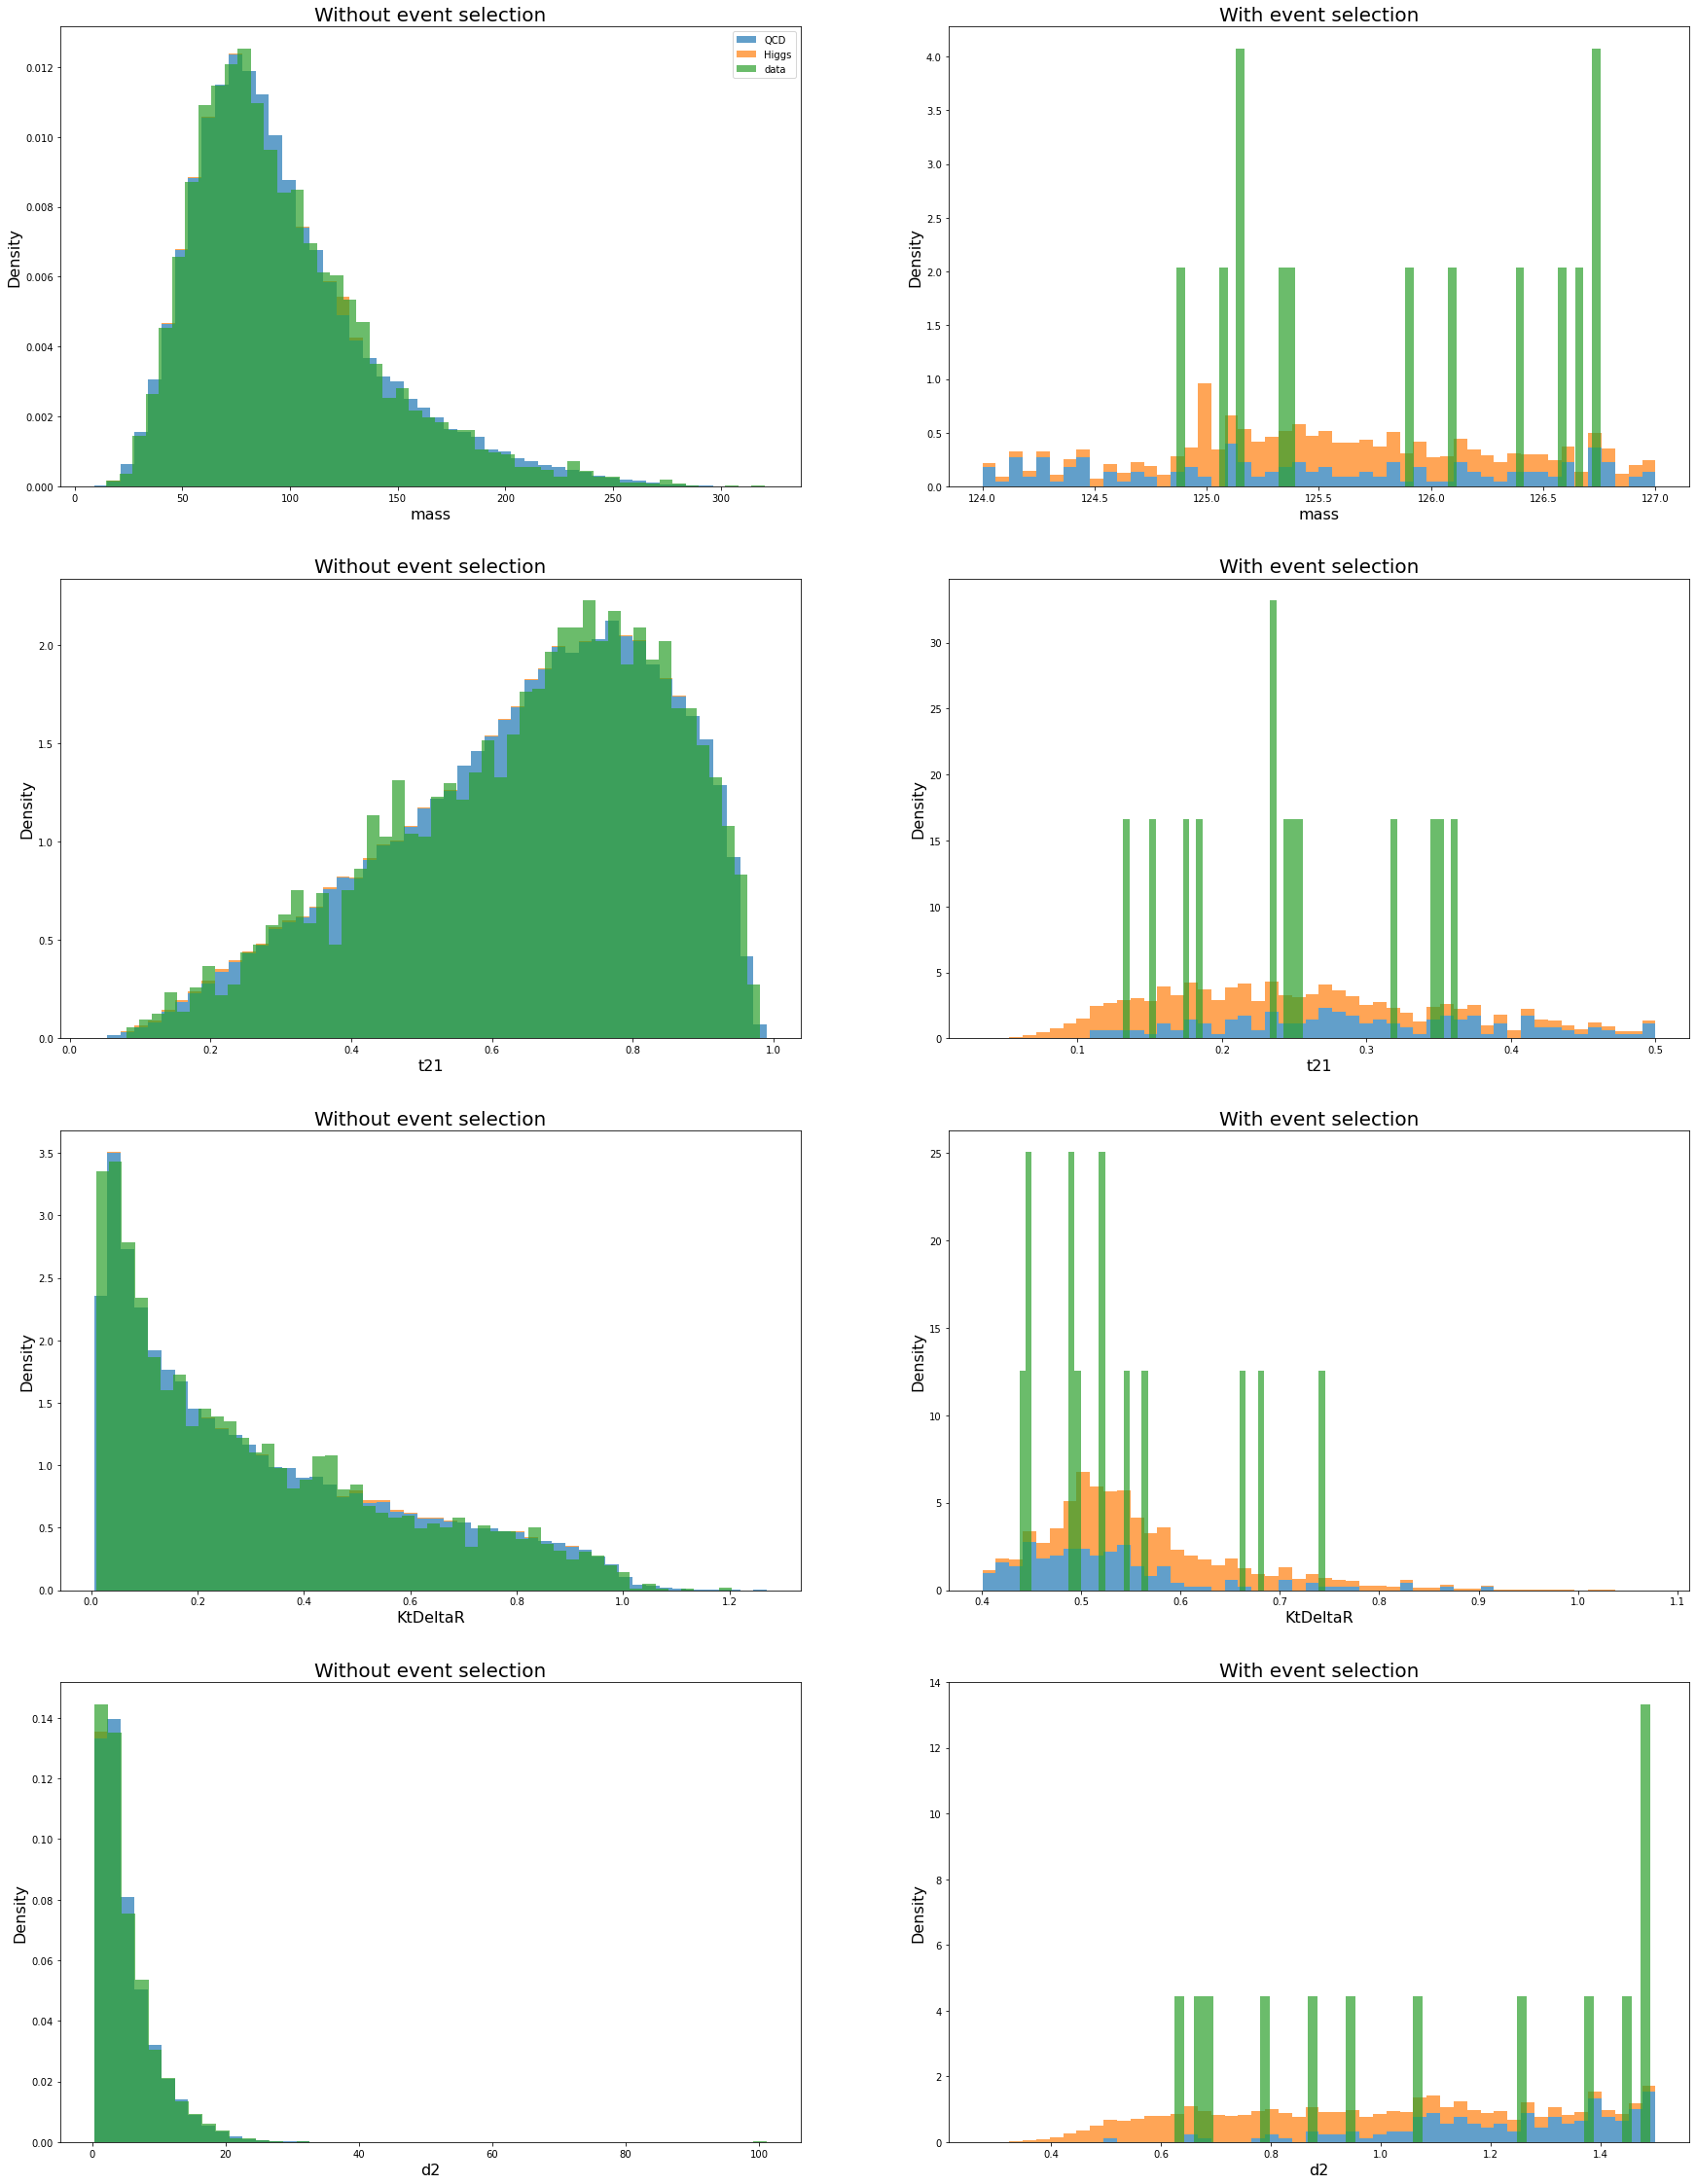

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(30, 40))
n = 0
for key in ['mass', 't21', 'KtDeltaR', 'd2']:
    higgs_optimized = []
    for i in range(len(higgs[key])):
        if higgs_mass[i] > 124 and higgs_mass[i] < 127 and higgs['t21'][i] < 0.5 and higgs['KtDeltaR'][i] > 0.4 and higgs['d2'][i] < 1.5:
            higgs_optimized.append(higgs[key][i])
        
    qcd_optimized = []
    for i in range(len(qcd[key])):
        if qcd_mass[i] > 124 and qcd_mass[i] < 127 and qcd['t21'][i] < 0.5 and qcd['KtDeltaR'][i] > 0.4 and qcd['d2'][i] < 1.5:
            qcd_optimized.append(qcd[key][i])
    
    low_data_optimized = []
    for i in range(len(low_data[key])):
        if low_data['mass'][i] > 124 and low_data['mass'][i] < 127 and low_data['t21'][i] < 0.5 and low_data['KtDeltaR'][i] > 0.4 and low_data['d2'][i] < 1.5:
            low_data_optimized.append(low_data[key][i])
    
    qcd_weights = np.ones_like(qcd[key]) / 5
    higgs_weights = np.ones_like(higgs[key]) / 1000
    data_weights = np.ones_like(low_data[key])
    
    qcd_optimized_weights = np.ones_like(qcd_optimized) / 5
    higgs_optimized_weights = np.ones_like(higgs_optimized) / 1000
    data_optimized_weights = np.ones_like(low_data_optimized)
            
    ax[n, 0].hist((qcd[key], higgs[key]), bins=50, log=False, weights=(qcd_weights, higgs_weights), density=True, stacked=True, alpha=0.7, label=('QCD', 'Higgs'))
    ax[n, 0].hist(low_data[key], bins=50, weights=data_weights, density=True, alpha=0.7, label='data')
    ax[n, 1].hist((qcd_optimized, higgs_optimized), bins=50, log=False, weights=(qcd_optimized_weights, higgs_optimized_weights), density=True, stacked=True, alpha=0.7)
    ax[n, 1].hist(low_data_optimized, bins=50, weights=data_optimized_weights, density=True, alpha=0.7)
    
    ax[n, 0].set_title('Without event selection')
    ax[n, 1].set_title('With event selection')
    
    for i in range(2):
        ax[n, i].set_xlabel(str(key))
        ax[n, i].set_ylabel('Density')
    
    n += 1
ax[0, 0].legend(loc=0);

In [26]:
((len(low_data_optimized) - len(qcd_optimized) * 4060/100000))/np.sqrt(len(qcd_optimized) * 4060/100000)

2.825960876385875

We obtain a significance of $2.83 \sigma$. The detection significance is lower for the low-luminosity data, due to the fact that there are fewer data points overall.

## Problem 3

Following the procedure of Lab 6, we will determine an expected 95% confidence upper limit via signal injection. We set the background to be Poisson-distributed, with a mean equal to the QCD counts (after feature cuts), normalized to the size of the pseudo-experimental data set. We then draw and inject signals from a uniform distribution.

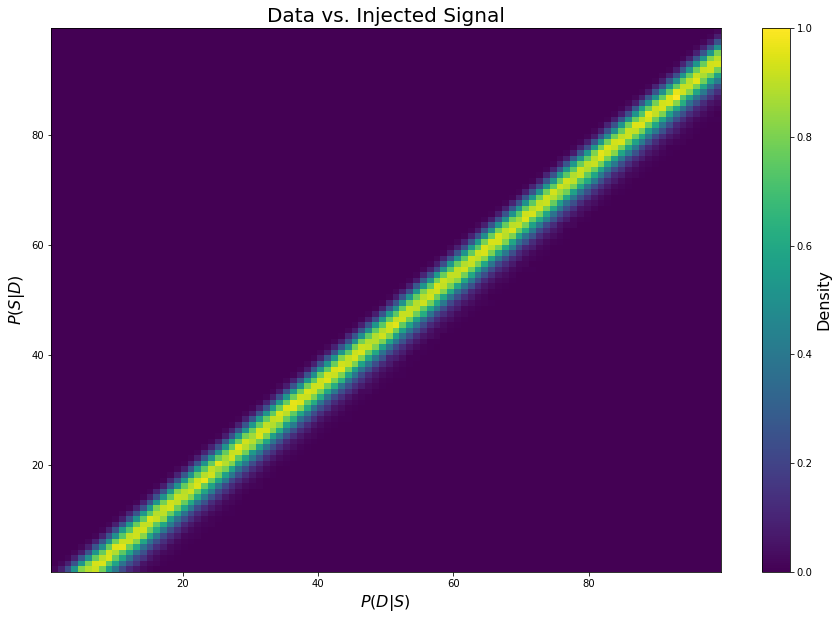

In [27]:
bkgd = stats.poisson.rvs(mu=len(qcd_optimized) * (4060/100000), size=int(1e6))
sig  = stats.uniform.rvs(loc=0, scale=100, size=int(1e6))
data = bkgd + sig

signaledges = np.linspace(0, 100, 100)
dataedges = np.linspace(0, 100, 100)

Psd, temp, temp2 = np.histogram2d(data, sig, bins=[dataedges, signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T)
plt.title('Data vs. Injected Signal')
plt.ylabel(r'$P(S|D)$')
plt.xlabel(r'$P(D|S)$')
plt.colorbar(plt.cm.ScalarMappable(), label='Density');

In [29]:
len(low_data_optimized)

13

After feature cuts, the pseudo-experimental data contains 13 events. So, we take a slice of the above histogram corresponding to $P(S|D=13)$, and use this to determine a confidence interval on the signal yield.

In [30]:
sig_250 = Psd[12]

prob_1s = 0.975

prob = [sig_250[i] * temp2[i] for i in range(len(sig_250))]
prob = prob / sum(prob)

n = 0
cdf = 0.0
in_low_tail = True

for i in range(len(prob)):
    n += 1
    cdf += prob[i]
    if in_low_tail == True and cdf >= 1.0 - prob_1s:
        in_low_tail = False
        minus_1s = temp2[i]
        print(temp2[i])
    if cdf >= prob_1s:
        plus_1s = temp2[i]
        print(temp2[i])
        break

3.0303030303030303
11.111111111111112


As a check, we plot the histogram of the signal that could have made this data.

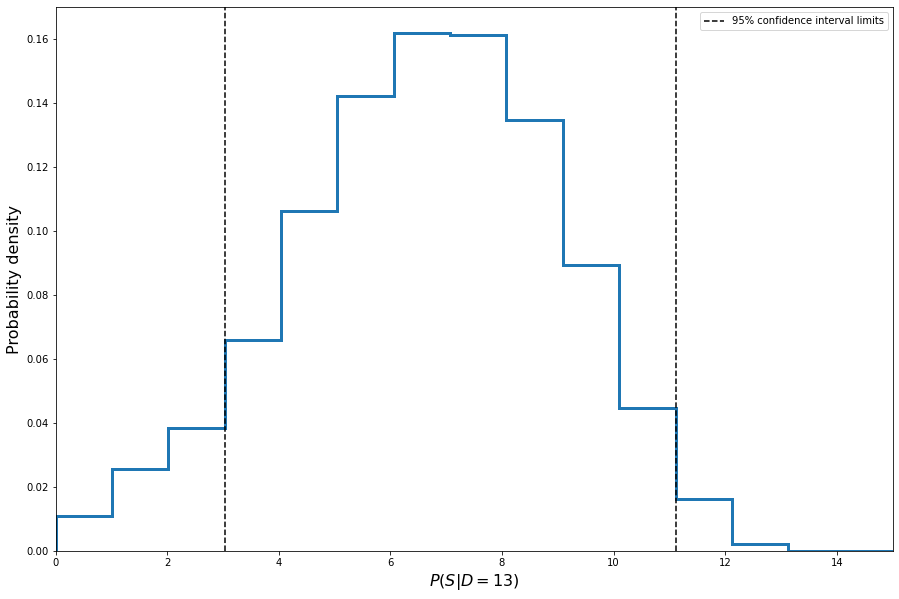

In [31]:
fig, ax = plt.subplots(1, 1)
ax.stairs(Psd[12]/sum(Psd[12]), temp2, lw=3)
ax.axvline(minus_1s, c='k', ls='--', label='95% confidence interval limits')
ax.axvline(plus_1s, c='k', ls='--')
ax.set_xlim(0, 15)
ax.set_xlabel(r'$P(S|D=13)$')
ax.set_ylabel('Probability density')
ax.legend(loc=0);

We find a 95% confidence upper limit of about 11 events.

We must now to determine an observed 95% confidence upper limit from low-luminosity data, *i.e.*, at what signal value we find a CDF of 0.975.

In [32]:
stats.norm.ppf(0.975)

1.959963984540054

This corresponds to $\sim 1.96 \sigma$, so we must find the signal strength $N_\text{Higgs}$ that will make $N_\text{Higgs}/\sqrt{N_\text{QCD}} = 1.96$.

In [33]:
1.96 * np.sqrt( len(qcd_optimized) / 5 )

10.699517746141646

The 95% confidence upper limit is about 10.7 Higgs counts. This is very close to our expected limit from the signal injection test.